In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
from api_keys import geoapify_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}q={city}&appid={weather_api_key}&units={units}"
    response = requests.get(city_url)
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = response.json()
        if response.status_code == 200:
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather['coord']['lat']
            city_lng =  city_weather['coord']['lon']
            city_max_temp =  city_weather['main']['temp_max']
            city_humidity =  city_weather['main']['humidity']
            city_clouds =  city_weather['clouds']['all']
            city_wind =  city_weather['wind']['speed']
            city_country =  city_weather['sys']['country']
            city_date =  city_weather['dt']

        # Append the City information into city_data list
            city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                             })

    # If an error is experienced, skip the city

    except Exception as e:
        print(f"Error retrieving data for {city}: {e}")


    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | arawa
Processing Record 4 of Set 1 | college
Processing Record 5 of Set 1 | sebastopol
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | ribeira grande
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | cannonvale
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | glace bay
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | minas de marcona
Processing Record 17 of Set 1 | san luis de la loma
Processing Record 18 of Set 1 | mangrol
Processing Record 19 of Set 1 | tsiolkovskiy
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | mil'kovo
Processing Record 22

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          604
Lat           604
Lng           604
Max Temp      604
Humidity      604
Cloudiness    604
Wind Speed    604
Country       604
Date          604
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,ushuaia,-54.8000,-68.3000,6.81,65,20,7.20,AR,1730339577
1,port-aux-francais,-49.3500,70.2167,4.22,84,25,10.88,TF,1730339578
2,arawa,-6.2132,155.5367,28.83,79,100,1.20,PG,1730339579
3,college,64.8569,-147.8028,-10.01,75,20,1.54,US,1730339580
4,sebastopol,44.6000,33.5333,11.11,63,15,4.09,UA,1730339582


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,6.81,65,20,7.20,AR,1730339577
1,port-aux-francais,-49.3500,70.2167,4.22,84,25,10.88,TF,1730339578
2,arawa,-6.2132,155.5367,28.83,79,100,1.20,PG,1730339579
3,college,64.8569,-147.8028,-10.01,75,20,1.54,US,1730339580
4,sebastopol,44.6000,33.5333,11.11,63,15,4.09,UA,1730339582


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

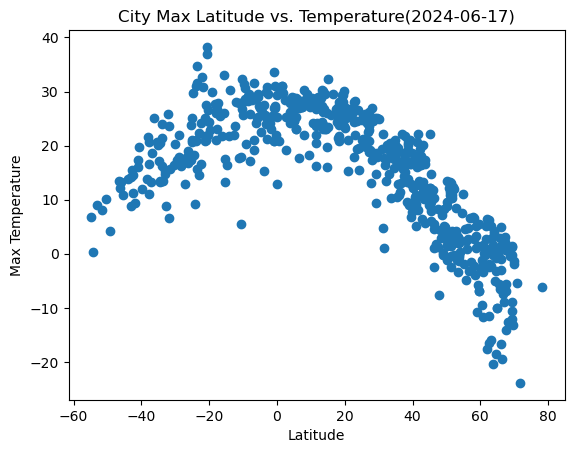

In [13]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df['Lat']
y_values=city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title(f'City Max Latitude vs. Temperature(2024-06-17)')
plt.xlabel(f'Latitude')
plt.ylabel(f'Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

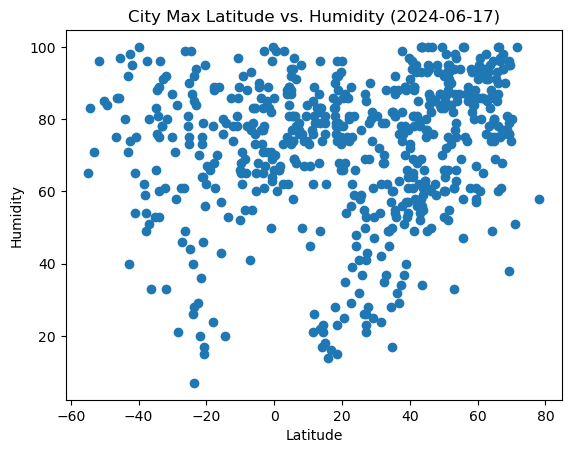

In [14]:
# Build scatter plot for latitude vs.Humidity
x_values=city_data_df['Lat']
y_values=city_data_df['Humidity']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title(f'City Max Latitude vs. Humidity (2024-06-17)')
plt.xlabel(f'Latitude')
plt.ylabel(f'Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

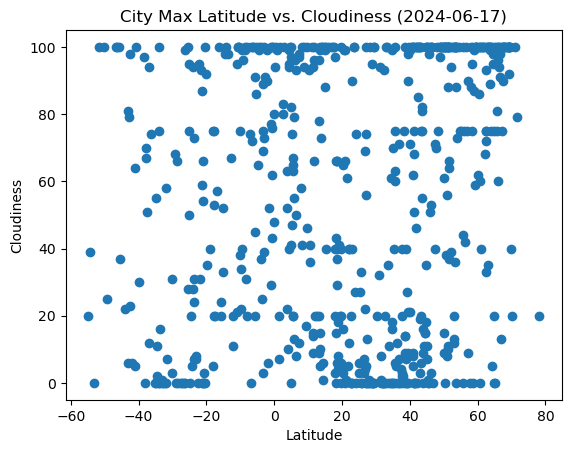

In [15]:
# Build the scatter plots for latitude vs. cloudiness
x_values=city_data_df['Lat']
y_values=city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title(f'City Max Latitude vs. Cloudiness (2024-06-17)')
plt.xlabel(f'Latitude')
plt.ylabel(f'Cloudiness')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

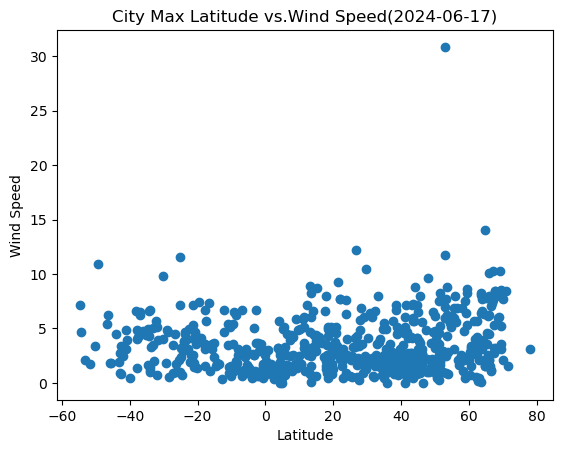

In [16]:
# Build the scatter plots for latitude vs. wind speed
x_values=city_data_df['Lat']
y_values=city_data_df['Wind Speed']

# Incorporate the other graph properties
plt.scatter(x_values,y_values)
plt.title(f'City Max Latitude vs.Wind Speed(2024-06-17)')
plt.xlabel(f'Latitude')
plt.ylabel(f'Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
# Define a function to create Linear Regression plots
def create_linear_regression(x_values, y_values, x_titles, y_titles):
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regression_line = slope * x_values + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))

    plt.figure(figsize=(10, 6))
    plt.scatter(x_values, y_values, color='blue', label='Data Points')
    plt.plot(x_values, regression_line, color='red', label='Regression Line')
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.title('Linear Regression Plot')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [43]:
print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,college,64.8569,-147.8028,-10.01,75,20,1.54,US,1730339580
4,sebastopol,44.6000,33.5333,11.11,63,15,4.09,UA,1730339582
6,ribeira grande,38.5167,-28.7000,20.99,89,9,7.15,PT,1730339584
7,yellowknife,62.4560,-114.3525,-11.44,98,75,2.57,CA,1730339585
11,glace bay,46.1969,-59.9570,5.50,82,100,3.13,CA,1730339255


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,ushuaia,-54.8000,-68.3000,6.81,65,20,7.20,AR,1730339577
1,port-aux-francais,-49.3500,70.2167,4.22,84,25,10.88,TF,1730339578
2,arawa,-6.2132,155.5367,28.83,79,100,1.20,PG,1730339579
5,grytviken,-54.2811,-36.5092,0.36,83,39,4.68,GS,1730339583
8,puerto natales,-51.7236,-72.4875,8.18,96,100,1.73,CL,1730339586


###  Temperature vs. Latitude Linear Regression Plot

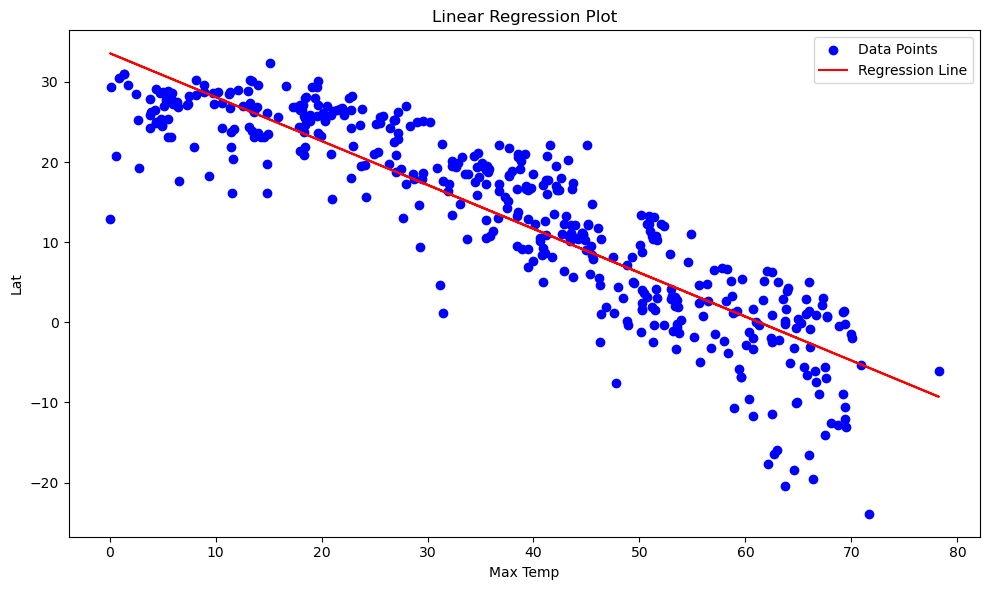

In [48]:
# Linear regression on Northern Hemisphere
x_title = "Max Temp"
y_title = "Lat"
y_values = northern_hemi_df['Max Temp']
x_values = northern_hemi_df['Lat']

create_linear_regression(x_values, y_values, x_title, y_title)

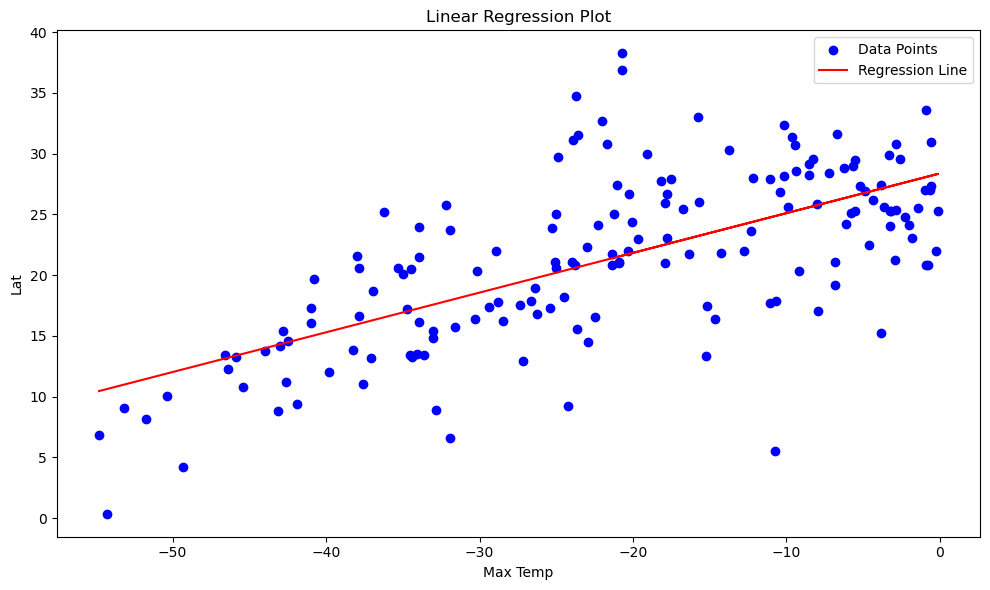

In [49]:
# Linear regression on Southern Hemisphere
x_title = "Max Temp"
y_title = "Lat"
y_values = southern_hemi_df['Max Temp']
x_values = southern_hemi_df['Lat']

create_linear_regression(x_values, y_values, x_title, y_title)

### Humidity vs. Latitude Linear Regression Plot

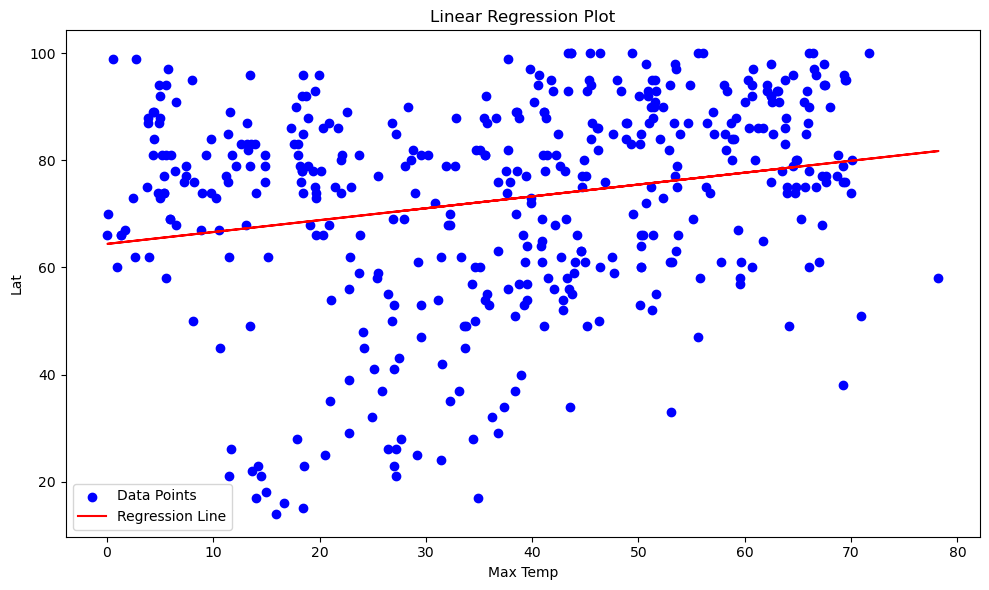

In [50]:
# Northern Hemisphere
y_values=northern_hemi_df['Humidity']
x_values=northern_hemi_df['Lat']

create_linear_regression(x_values,y_values, 'Humidity', 'Latitude')

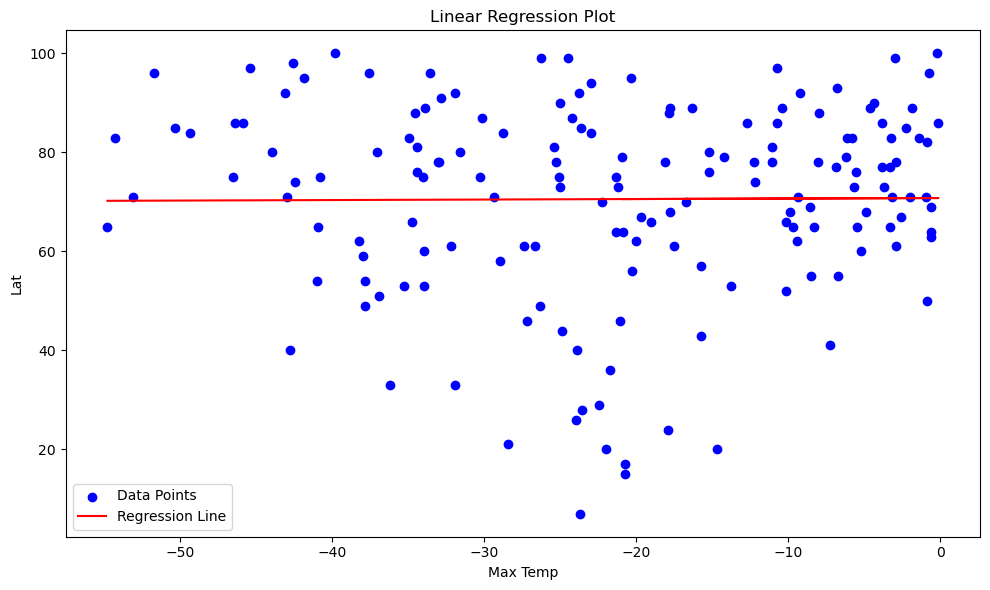

In [52]:
# Southern Hemisphere
y_values=southern_hemi_df['Humidity']
x_values=southern_hemi_df['Lat']

create_linear_regression(x_values,y_values, 'Humidity', 'Latitude')

### Cloudiness vs. Latitude Linear Regression Plot

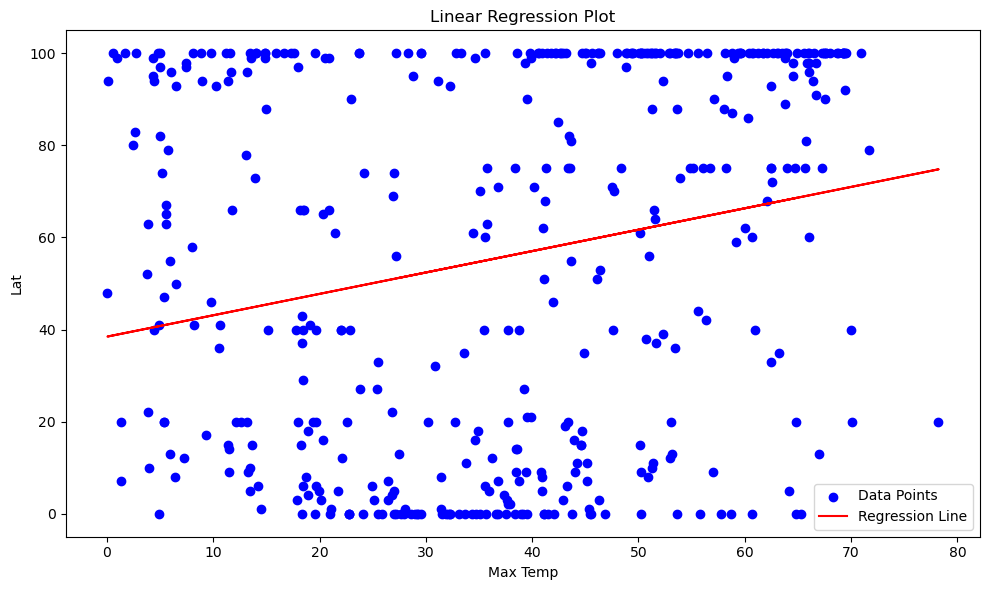

In [54]:
# Northern Hemisphere
y_values=northern_hemi_df['Cloudiness']
x_values=northern_hemi_df['Lat']

create_linear_regression(x_values,y_values, 'Cloudiness', 'Latitude')

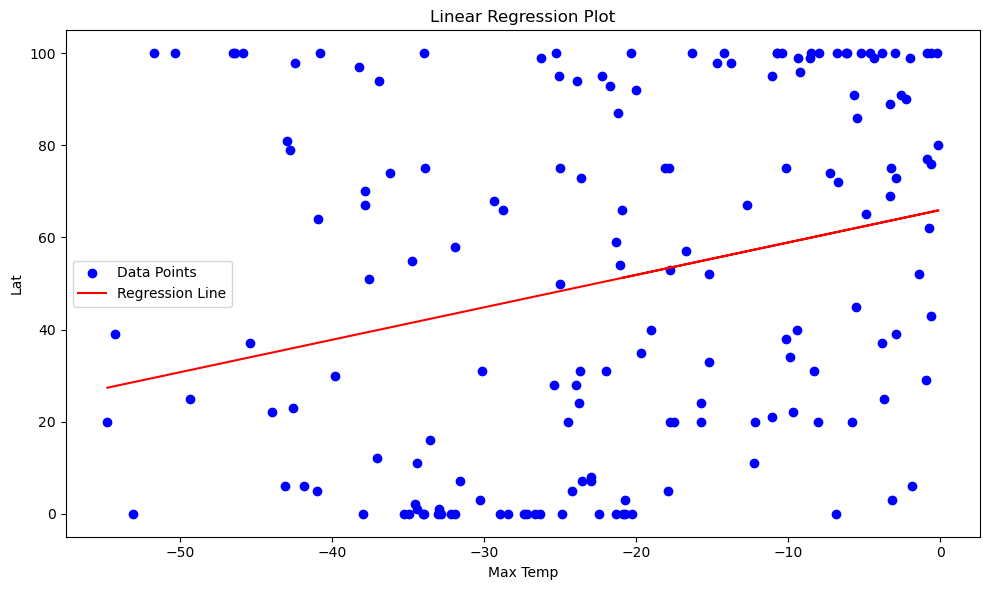

In [55]:
# Southern Hemisphere
y_values=southern_hemi_df['Cloudiness']
x_values=southern_hemi_df['Lat']

create_linear_regression(x_values,y_values, 'Cloudiness', 'Latitude')

### Wind Speed vs. Latitude Linear Regression Plot

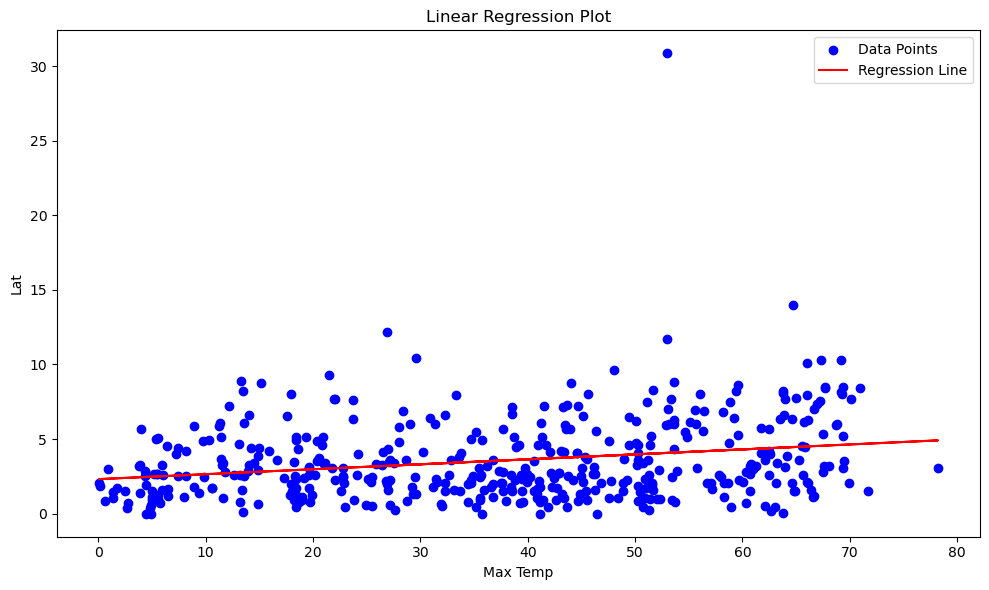

In [56]:
# Northern Hemisphere
y_values=northern_hemi_df['Wind Speed']
x_values=northern_hemi_df['Lat']

create_linear_regression(x_values,y_values, 'Wind Speed', 'Latitude')

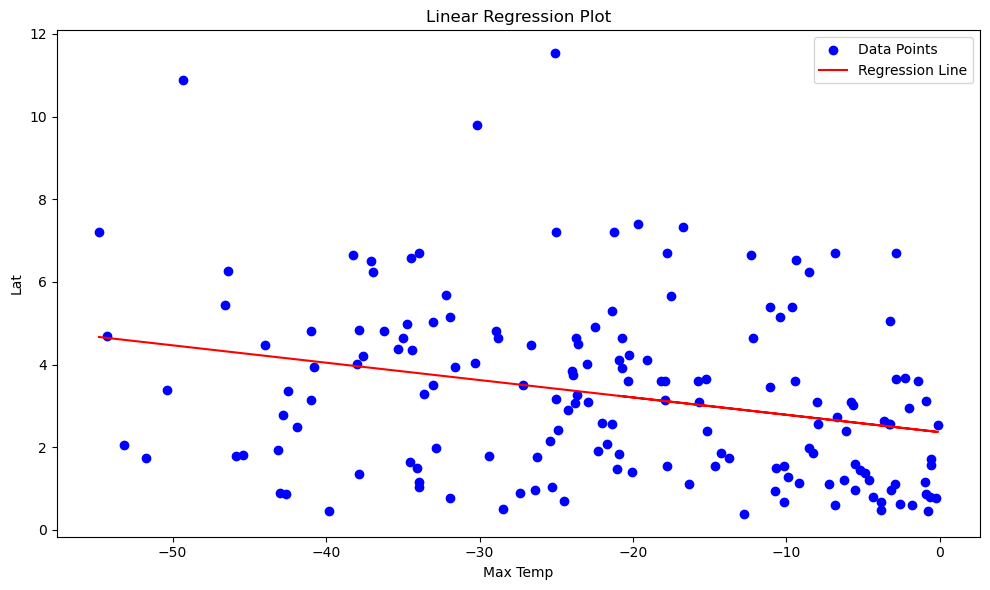

In [57]:
# Southern Hemisphere
y_values=southern_hemi_df['Wind Speed']
x_values=southern_hemi_df['Lat']

create_linear_regression(x_values,y_values, 'Wind Speed', 'Latitude')